Deklarasi Library

In [1]:
#Aditya Allaam
#11190910000084
'''--------------'''
#Deklarasi Library
import pandas as pd # -> pada kasus ini dilakukan untuk input data.
import seaborn as sns # -> untuk melakukan visualisasi pada data.
import matplotlib.pyplot as plt # -> untuk melakukan visualisasi pada data. 
import numpy as np 

Input Dataset

In [2]:
df_data = pd.read_csv('C:/Users/adity/Documents/Kuliah/Semester 5/Big Data/UAS/Iris.csv', index_col=0)
df_data = df_data.reset_index()
df_data = df_data.drop(['Id'], axis = 1)
df_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
mv = df_data.isnull()
mv = mv.sum()
mv = pd.DataFrame(mv).reset_index()
mv = mv.rename({0 : 'Jumlah Missing Value'}, axis = 1)
mv.head()

,index,Jumlah Missing Value
0,SepalLengthCm,0
1,SepalWidthCm,0
2,PetalLengthCm,0
3,PetalWidthCm,0
4,Species,0


Pra-proses Data

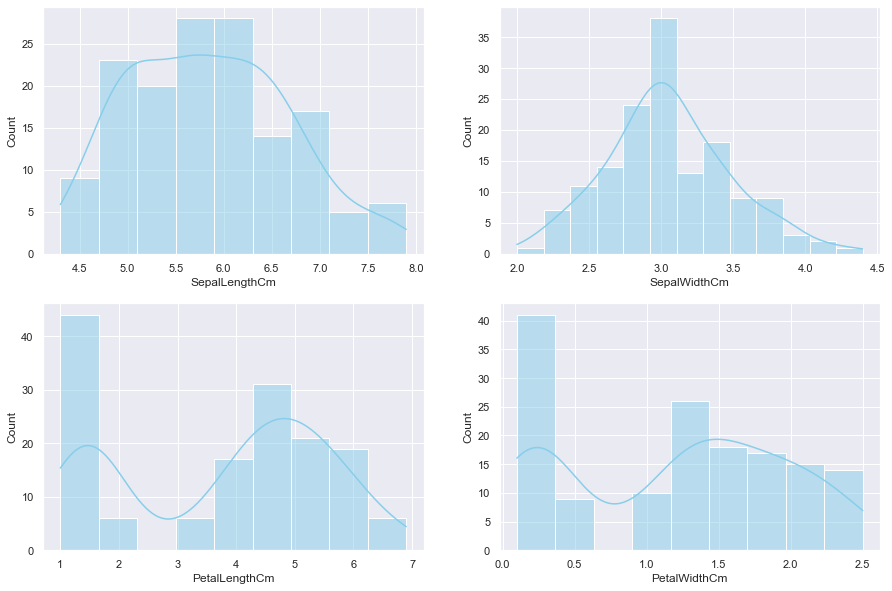

In [6]:
#Melakukan pra-proses pada data.
'''
    Melakukan normalisasi pada data. 
    Melakukan Pelabelan pada kolom data species
'''

#https://www.kaggle.com/abxinth/irisdataset-score-96-various-model-eda
#https://www.kaggle.com/cloudy17/iris-k-means-clustering


'''
n_rows =  2
n_cols  = 2
count   = 0 
col_num = 1

plt.subplots(n_rows, n_rows)
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplots(n_rows, n_cols, count+1)
        sns.histplot(df_data.iloc[:, 3], orient = 'vertical')
        if col_num < df_data.shape[1]:
            count += 1
            col_num += 1

plt.show()
'''

sns.set(style = 'darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df_data, x="SepalLengthCm", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_data, x="SepalWidthCm", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df_data, x="PetalLengthCm", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df_data, x="PetalWidthCm", kde=True, color="skyblue", ax=axs[1, 1])

plt.show()


<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

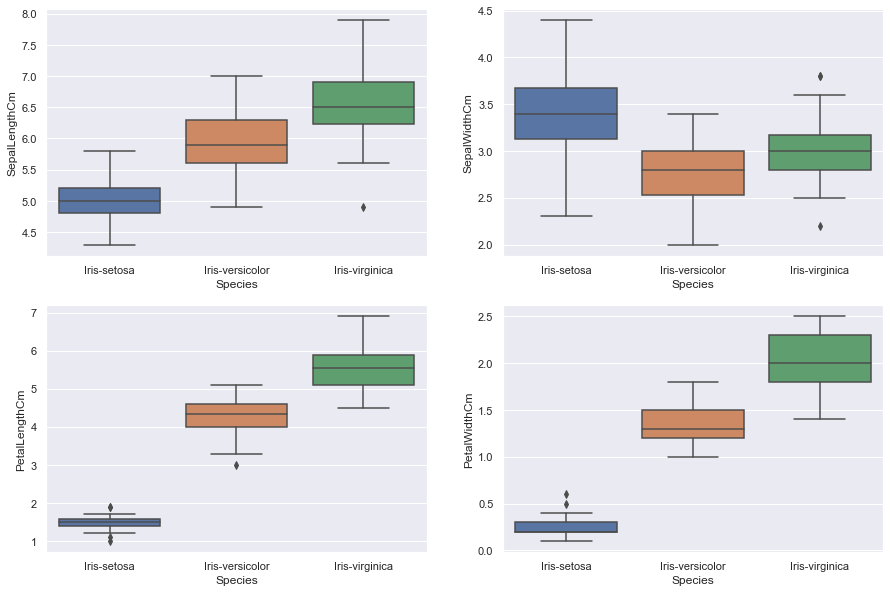

In [7]:
#Melakukan visualisasi dengan boxplot

fig, axs = plt.subplots(2,2, figsize=(15, 10))

sns.boxplot(data = df_data, x='Species', y='SepalLengthCm', ax = axs[0,0])
sns.boxplot(data = df_data, x='Species', y='SepalWidthCm', ax = axs[0,1])
sns.boxplot(data = df_data, x='Species', y='PetalLengthCm', ax = axs[1,0])
sns.boxplot(data = df_data, x='Species', y='PetalWidthCm', ax = axs[1,1])

In [8]:
#Menghitung nilai data dari string
#---------------------------------
df_species = df_data['Species'].value_counts()
df_species = pd.DataFrame(df_species).reset_index()
df_species = df_species.rename({'index' : 'Species', 'Species' : 'Total'}, axis = 1)
df_species.head()

,Species,Total
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


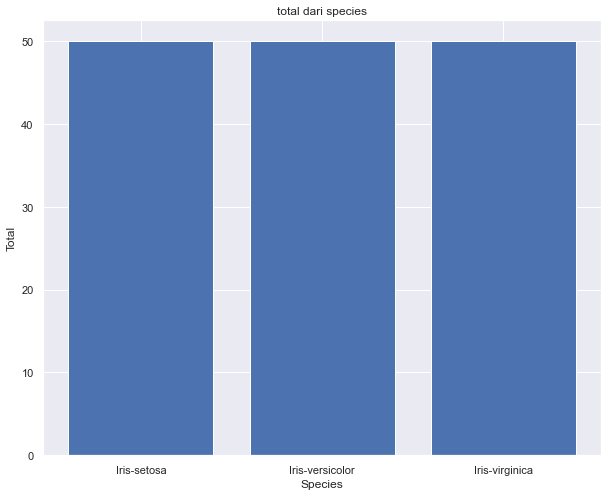

In [9]:
#Membuat visualisasi jumlah dari species

plt.figure(figsize=(10, 8))

plt.bar(df_species['Species'], df_species['Total'])
plt.title('total dari species')
plt.xlabel('Species')
plt.ylabel('Total')
plt.show()

Text(0.5, 1.0, 'Nilai Korelasi Antar data')

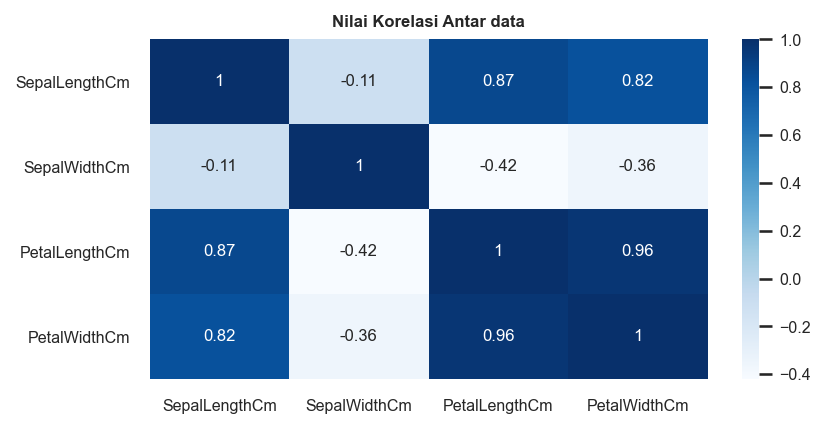

In [55]:
#Melihat nilai korelasi antar variabel
#Membuat heatmap.

plt.figure(figsize=(6,3), dpi=150)
sns.set(font_scale=0.7)
heatmap = sns.heatmap(df_data.corr(), annot=True, cmap='Blues', annot_kws={'size': 8})
heatmap.set_title('Nilai Korelasi Antar data', fontdict={'fontsize':8, 'fontweight':'bold'})

In [10]:
#Melakukan pelabelan pada kolim spesies.
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_data['Species'] = le.fit_transform(df_data['Species'])
df_data
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndf_data['Species'] = le.fit_transform(df_data['Species'])\ndf_data\n"

In [11]:
#Membuat dataframe baru dengan pada kolom species 
df_Species = df_data['Species']
df_Species = pd.DataFrame(df_Species)
df_Species.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
#Melakukan drop data dengan visualisasi
df_data = df_data.drop(['Species'], axis = 1)

In [13]:
#Melakukan normalisasi pada data dengan rentang 0 - 1. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_column = df_data.columns
sc_data = scaler.fit_transform(df_data)
sc_data = pd.DataFrame(sc_data, columns=data_column)
sc_data = sc_data.round(decimals = 3)
sc_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222,0.625,0.068,0.042
1,0.167,0.417,0.068,0.042
2,0.111,0.500,0.051,0.042
3,0.083,0.458,0.085,0.042
4,0.194,0.667,0.068,0.042
...,...,...,...,...
145,0.667,0.417,0.712,0.917
146,0.556,0.208,0.678,0.750
147,0.611,0.417,0.712,0.792
148,0.528,0.583,0.746,0.917


In [14]:
#Menggabungkan kembali dua dataframe
df_data = pd.concat([sc_data, df_Species], axis = 1)
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222,0.625,0.068,0.042,Iris-setosa
1,0.167,0.417,0.068,0.042,Iris-setosa
2,0.111,0.500,0.051,0.042,Iris-setosa
3,0.083,0.458,0.085,0.042,Iris-setosa
4,0.194,0.667,0.068,0.042,Iris-setosa
...,...,...,...,...,...
145,0.667,0.417,0.712,0.917,Iris-virginica
146,0.556,0.208,0.678,0.750,Iris-virginica
147,0.611,0.417,0.712,0.792,Iris-virginica
148,0.528,0.583,0.746,0.917,Iris-virginica


Pembagian data(SplitValidasi)

In [15]:
#Melakukan split validasi pada data
#Cari 2 metode pembagian dari (Split Validasi, KFold dan Hold Out)

from sklearn.model_selection import train_test_split

X = df_data.drop('Species', axis = 1)
y = df_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Menghitung Jarak Data

In [16]:
#Menghitung nilai jarak antar data
#Mengitung jarak data dengan euclidean, mahttan dan hownski.

#https://www.statology.org/manhattan-distance-python/

'''
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

def xtrain_distance(row):
    distance = {}
    for i, each in X_train.iterrows():
        distance[i] = manhattan_distance(each, row)
    return distance

result = X_test.apply(xtrain_distance, axis = 1)
pd.DataFrame(dict(result)).transpose()
'''

'\ndef manhattan_distance(a, b):\n    return sum(abs(e1-e2) for e1, e2 in zip(a,b))\n\ndef xtrain_distance(row):\n    distance = {}\n    for i, each in X_train.iterrows():\n        distance[i] = manhattan_distance(each, row)\n    return distance\n\nresult = X_test.apply(xtrain_distance, axis = 1)\npd.DataFrame(dict(result)).transpose()\n'

In [17]:
'''
data_zip = list(zip(*[X_train[col] for col in X_train]))
data_zip
'''

'\ndata_zip = list(zip(*[X_train[col] for col in X_train]))\ndata_zip\n'

In [18]:
#Melakukan perhitngan jarak dengan minwoski.
#https://towardsdatascience.com/how-to-decide-the-perfect-distance-metric-for-your-machine-learning-model-2fa6e5810f11 

from scipy.spatial import minkowski_distance

dist_minkow = minkowski_distance(X_train['SepalLengthCm'], X_train['SepalWidthCm'])
dist_minkow2 = minkowski_distance(X_train['PetalLengthCm'], X_train['PetalWidthCm'])
print('Jarak antar data untuk sepal  : ', round(dist_minkow, 3))
print('Jarak antar data untuk Petal  : ', round(dist_minkow2,3))

Jarak antar data untuk sepal  :  3.325
Jarak antar data untuk Petal  :  0.967


In [19]:
#Menghitung jarak dengan minwoski per-index

In [20]:
from scipy.spatial.distance import euclidean

dist_eucli  = euclidean(X_train['SepalLengthCm'], X_train['SepalWidthCm'])
dist_eucli2 = euclidean(X_train['PetalLengthCm'], X_train['PetalWidthCm'])
print('Jarak antar data untuk sepal : ', round(dist_eucli, 3))
print('Jarak antar data untuk petal : ', round(dist_eucli2,3))

Jarak antar data untuk sepal :  3.325
Jarak antar data untuk petal :  0.967


In [21]:
#Menghitung jarak dengan euclidean per-index

In [22]:
#Menghitung perhitungan jarak dengan euclidean 
#Deklarasi nilai dari masing masing cluster.
'''
import numpy as np

#Menggunakan nilai yang telah dilakukan normalisasi
C1 = [0.167, 0.417, 0.068, 0.042]
C2 = [0.583, 0.500, 0.593, 0.583]
C3 = [0.417, 0.292, 0.692, 0.750]

#membatasi data pada setiap cluster.
data_c1 = sc_data.iloc[0:50]
data_c2 = sc_data.iloc[51:100]
data_c3 = sc_data.iloc[101:150]

data_c1['jarak_data'] = data_c1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C1)).pow(2).sum(1).pow(0.5)
data_c2['jarak_data'] = data_c2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)
data_c3['jarak_data'] = data_c3[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C3)).pow(2).sum(1).pow(0.5)

jarak_euclidean1 = data_c1['jarak_data'].sum()
jarak_euclidean2 = data_c2['jarak_data'].sum()
jarak_euclidean3 = data_c3['jarak_data'].sum()

print('Perhitungan euclidean pada cluester 1 menghasilkan nilai : ', round(jarak_euclidean1, 3))
print('Perhitungan euclidean pada cluester 2 menghasilkan nilai : ', round(jarak_euclidean2, 3))
print('Perhitungan euclidean pada cluester 3 menghasilkan nilai : ', round(jarak_euclidean3, 3))

jarak_euclidean = jarak_euclidean1 + jarak_euclidean2 + jarak_euclidean3
print('-------------------------------------------')
print('Perhitungan euclidean menghasilkan nilai : ', round(jarak_euclidean, 3))
'''



"\nimport numpy as np\n\n#Menggunakan nilai yang telah dilakukan normalisasi\nC1 = [0.167, 0.417, 0.068, 0.042]\nC2 = [0.583, 0.500, 0.593, 0.583]\nC3 = [0.417, 0.292, 0.692, 0.750]\n\n#membatasi data pada setiap cluster.\ndata_c1 = sc_data.iloc[0:50]\ndata_c2 = sc_data.iloc[51:100]\ndata_c3 = sc_data.iloc[101:150]\n\ndata_c1['jarak_data'] = data_c1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C1)).pow(2).sum(1).pow(0.5)\ndata_c2['jarak_data'] = data_c2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C2)).pow(2).sum(1).pow(0.5)\ndata_c3['jarak_data'] = data_c3[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].sub(np.array(C3)).pow(2).sum(1).pow(0.5)\n\njarak_euclidean1 = data_c1['jarak_data'].sum()\njarak_euclidean2 = data_c2['jarak_data'].sum()\njarak_euclidean3 = data_c3['jarak_data'].sum()\n\nprint('Perhitungan euclidean pada cluester 1 menghasilkan nilai : ', round(jarak_euclidean1, 3))\nprint('P

Klastering data - K.Means

In [23]:
#Membuat plot visualisasi pada data.
'''
sns.set_style("whitegrid")
sns.pairplot(df_data,hue='Species',size=3)
plt.show()
'''

'\nsns.set_style("whitegrid")\nsns.pairplot(df_data,hue=\'Species\',size=3)\nplt.show()\n'

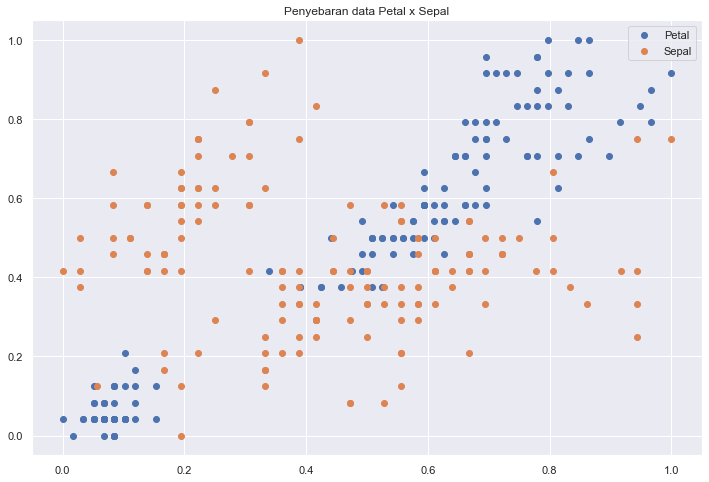

In [24]:
#Membuat visualisasi sebelum dilakukan pemroessan dengan k-means
plt.figure(figsize = (12, 8))
plt.title('Penyebaran data Petal x Sepal')
plt.scatter(sc_data['PetalLengthCm'], sc_data['PetalWidthCm'], label = 'Petal')
plt.scatter(sc_data['SepalLengthCm'], sc_data['SepalWidthCm'], label = 'Sepal')

plt.legend()

Klasterisasi pertama - KMeans (SplitValidasi)

In [25]:
#Melakukan klasterisasi dengan K-Means
x = X_train.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [26]:
#Mencari nilai dari euclidean kmeans 
dist = np.linalg.norm(X_train - kmeans.cluster_centers_[0,:], axis = 1).reshape(-1, 1)
dist = np.append(dist,np.linalg.norm(X_train - kmeans.cluster_centers_[1,:],axis=1).reshape(-1, 1), axis = 1)
dist_sepal = np.append(dist,np.linalg.norm(X_train - kmeans.cluster_centers_[2,:],axis=1).reshape(-1, 1), axis = 1)

y_kmeans = np.argmin(dist_sepal, axis = 1)
y_kmeans = kmeans.fit_predict(x)

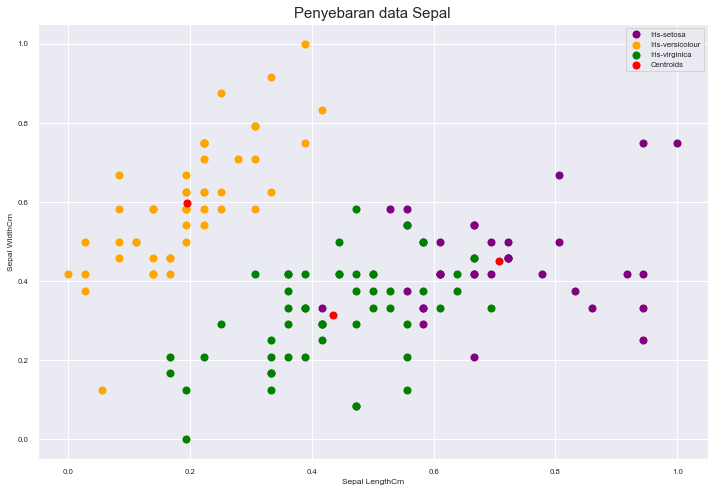

In [61]:
#Melakukan visualisasi k-menas - Penyabaran data pada Sepal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyebaran data Sepal', fontsize = 15)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Sepal LengthCm')
plt.ylabel('Sepal WidthCm')

plt.legend()


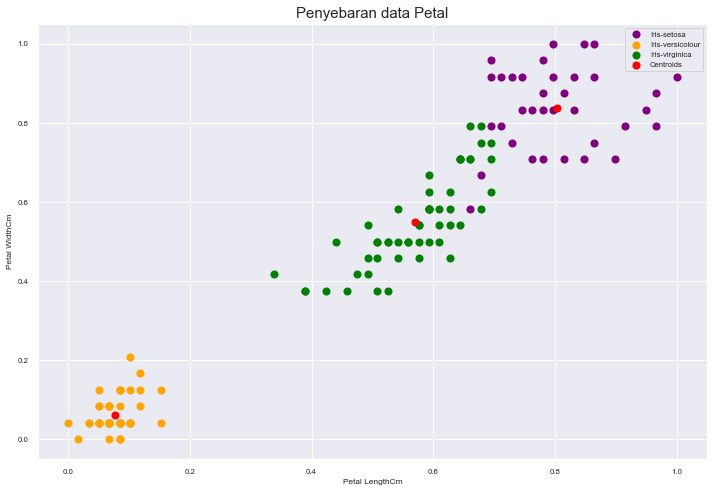

In [62]:
#Melakukan visualisasi k-menas - Penyabaran data pada Petal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

plt.title('Penyebaran data Petal', fontsize = 15)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Petal LengthCm')
plt.ylabel('Petal WidthCm')

plt.legend()

In [57]:
#Nilai dari centroids.
centroid_sepal = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1]
centroid_petal = kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3]
print('nilai dari centroids sepal :', centroid_sepal)
print('nilai dari centroid petal  :', centroid_petal)


nilai dari centroids sepal : (array([0.70791429, 0.19440426, 0.43550943]), array([0.45002857, 0.59748936, 0.31369811]))
nilai dari centroid petal  : (array([0.803     , 0.07740426, 0.57009434]), array([0.83808571, 0.06219149, 0.54869811]))


In [30]:
#Menghitung nilai SSE 
cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

clusterwise_sse = pd.DataFrame(clusterwise_sse)
clusterwise_sse = round(clusterwise_sse, 3)
clusterwise_sse = clusterwise_sse.rename({0:'SSE'}, axis = 1)
clusterwise_sse

,SSE
0,1.731
1,1.374
2,2.700


Klasterisasi Kedua - Hierarical Clustering(Split Validasi)

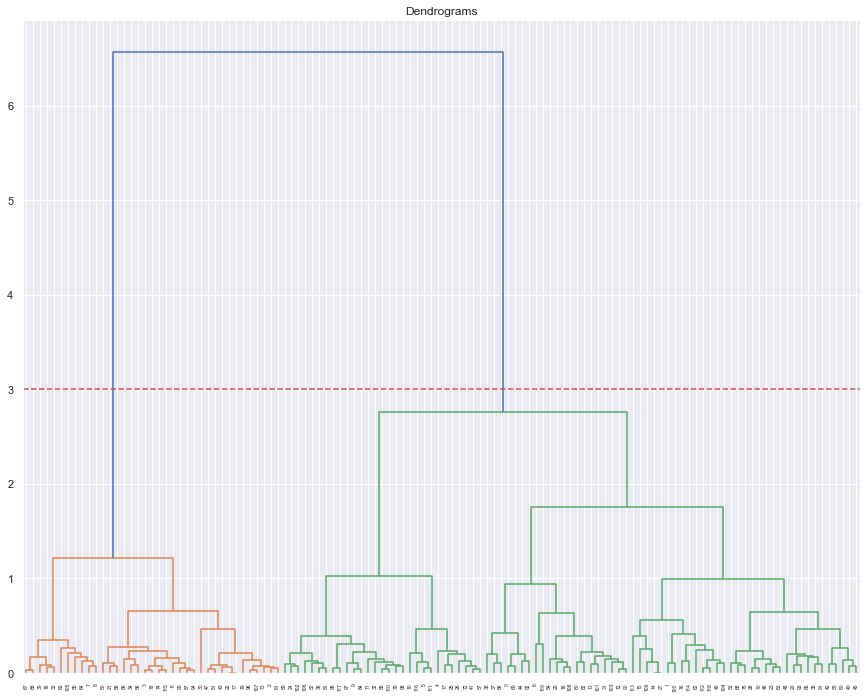

In [31]:
#https://algoritmaonline.com/introduction-to-hierarchical-clustering/

import scipy.cluster.hierarchy as shc
 
plt.figure(figsize =(15, 12))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(X_train, method = 'ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [32]:
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
#https://nzlul.medium.com/clustering-method-using-k-means-hierarchical-and-dbscan-using-python-5ca5721bbfc3

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc = cluster.fit_predict(X_train)

#nilai centroids 
clf = NearestCentroid()
centroid = clf.fit(X_train, y_hc)
centroid = clf.centroids_

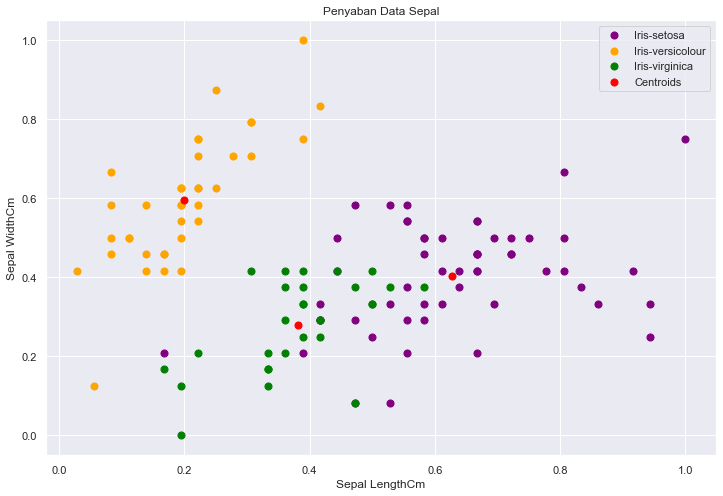

In [33]:
#Melakukan visualisasi k-menas - Penyabaran data pada Sepal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyaban Data Sepal')
plt.scatter(centroid[:, 0], centroid[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Sepal LengthCm')
plt.ylabel('Sepal WidthCm')

plt.legend()

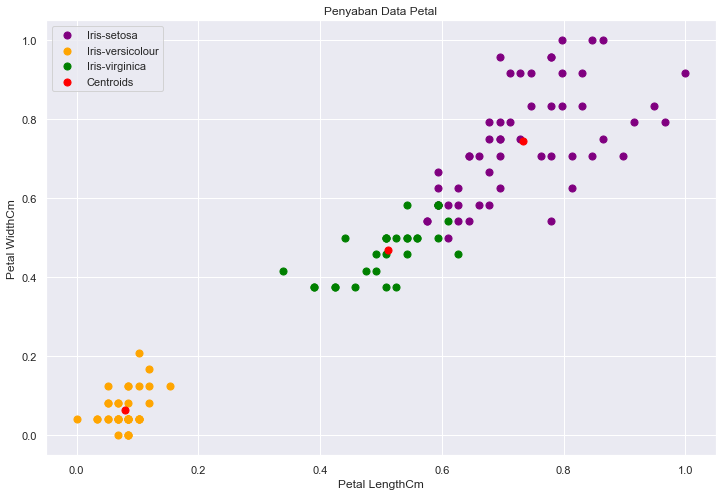

In [34]:
#Melakukan visualisasi k-menas - Penyabaran data pada Petal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_hc == 0, 2], x[y_hc == 0, 3], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 2], x[y_hc == 1, 3], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 2], x[y_hc == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyaban Data Petal')
plt.scatter(centroid[:, 2], centroid[:, 3], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Petal LengthCm')
plt.ylabel('Petal WidthCm')

plt.legend()

In [35]:
#Mencari nilai dari centorid
centroid_sepal = centroid[:, 0], centroid[:, 1]
centroid_petal = centroid[:, 2], centroid[:, 3]
print('nilai dari centroids sepal :', centroid_sepal)
print('nilai dari centroid petal  :', centroid_petal)


nilai dari centroids sepal : (array([0.62762963, 0.19889189, 0.38117241]), array([0.4042963 , 0.59681081, 0.2802069 ]))
nilai dari centroid petal  : (array([0.73387037, 0.07948649, 0.51068966]), array([0.7437963 , 0.06543243, 0.46834483]))


In [36]:
#Menghitung nilai SSE 
cluster_centers = [x[cluster.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, cluster.labels_):
    clusterwise_sse[label] += np.square(point - centroid[label]).sum()

clusterwise_sse = pd.DataFrame(clusterwise_sse)
clusterwise_sse = round(clusterwise_sse, 3)
clusterwise_sse = clusterwise_sse.rename({0:'SSE'}, axis = 1)
clusterwise_sse

,SSE
0,3.953
1,1.374
2,0.939


Pembagian data(KFold)

In [37]:
from sklearn.model_selection import KFold

kf_data = KFold(n_splits=10, random_state = 1, shuffle=True)
for train_index, test_index in kf_data.split(X, y):
    X_train, X_test, y_train, y_test =  X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

Kmeans Algoritma

In [38]:
x = X_train.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [39]:
#Mencari nilai dari euclidean kmeans 
dist = np.linalg.norm(X_train - kmeans.cluster_centers_[0,:], axis = 1).reshape(-1, 1)
dist = np.append(dist,np.linalg.norm(X_train - kmeans.cluster_centers_[1,:],axis=1).reshape(-1, 1), axis = 1)
dist_sepal = np.append(dist,np.linalg.norm(X_train - kmeans.cluster_centers_[2,:],axis=1).reshape(-1, 1), axis = 1)

y_kmeans = np.argmin(dist_sepal, axis = 1)
y_kmeans = kmeans.fit_predict(x)

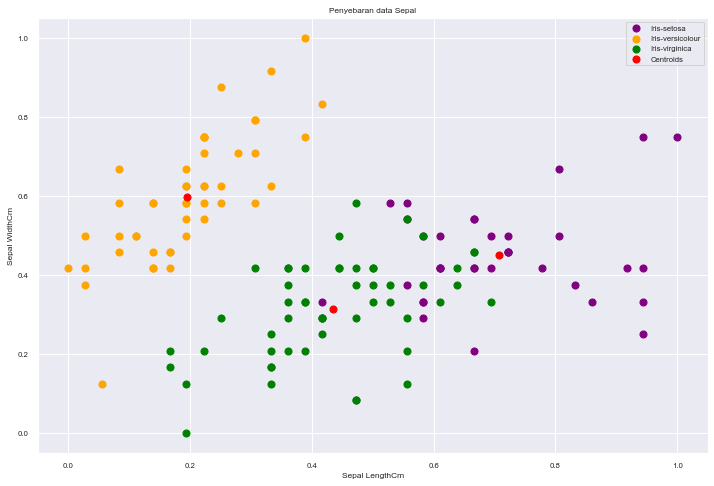

In [63]:
#Melakukan visualisasi k-menas - Penyabaran data pada Sepal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyebaran data Sepal')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Sepal LengthCm')
plt.ylabel('Sepal WidthCm')

plt.legend()


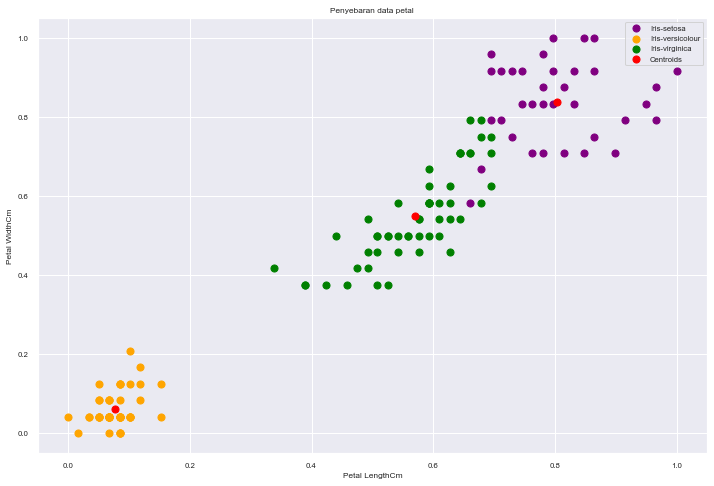

In [64]:
#Melakukan visualisasi k-menas - Penyabaran data pada Petal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

plt.title('Penyebaran data petal')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Petal LengthCm')
plt.ylabel('Petal WidthCm')

plt.legend()

In [42]:
#Nilai dari centroids.
centroid_sepal = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1]
centroid_petal = kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3]
print('nilai dari centroids sepal :', centroid_sepal)
print('nilai dari centroid petal  :', centroid_petal)

nilai dari centroids sepal : (array([0.70791429, 0.19440426, 0.43550943]), array([0.45002857, 0.59748936, 0.31369811]))
nilai dari centroid petal  : (array([0.803     , 0.07740426, 0.57009434]), array([0.83808571, 0.06219149, 0.54869811]))


In [43]:
#Menghitung nilai SSE 
cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

clusterwise_sse = pd.DataFrame(clusterwise_sse)
clusterwise_sse = round(clusterwise_sse, 3)
clusterwise_sse = clusterwise_sse.rename({0:'SSE'}, axis = 1)
clusterwise_sse

,SSE
0,1.851
1,1.775
2,2.770


Klasterisasi Kedua - Hierical Clustering

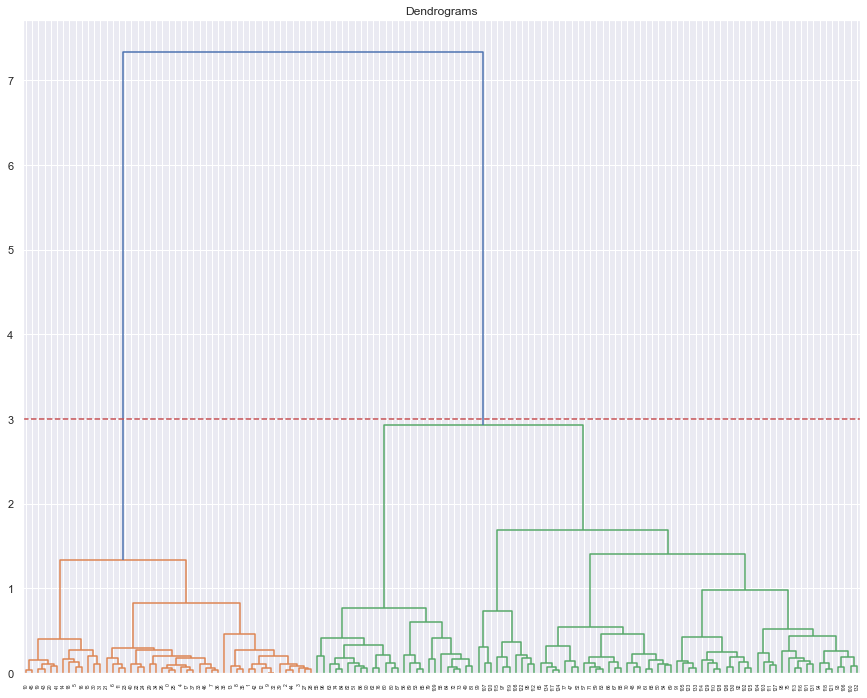

In [44]:
#https://algoritmaonline.com/introduction-to-hierarchical-clustering/

import scipy.cluster.hierarchy as shc
 
plt.figure(figsize =(15, 12))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(X_train, method = 'ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc = cluster.fit_predict(X_train)

#nilai centroids 
clf = NearestCentroid()
centroid = clf.fit(X_train, y_hc)
centroid = clf.centroids_

Text(0, 0.5, 'Sepal WidthCm')

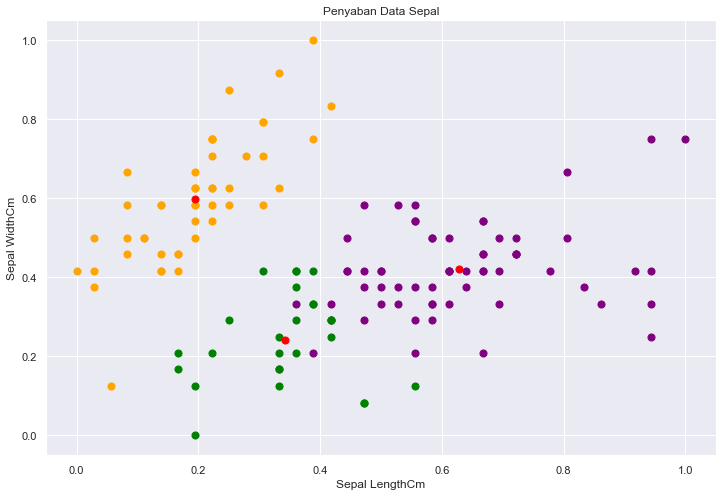

In [46]:
#Melakukan visualisasi k-menas - Penyabaran data pada Sepal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyaban Data Sepal')
plt.scatter(centroid[:, 0], centroid[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Sepal LengthCm')
plt.ylabel('Sepal WidthCm')

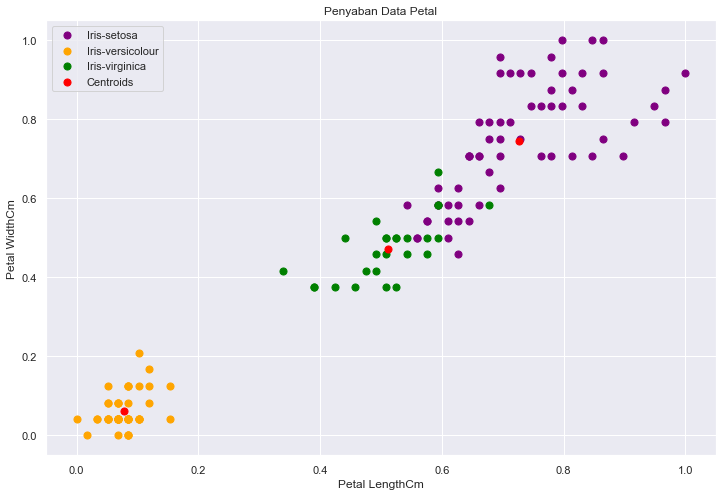

In [47]:
#Melakukan visualisasi k-menas - Penyabaran data pada Petal
plt.figure(figsize = (12, 8))
plt.scatter(x[y_hc == 0, 2], x[y_hc == 0, 3], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 2], x[y_hc == 1, 3], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 2], x[y_hc == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.title('Penyaban Data Petal')
plt.scatter(centroid[:, 2], centroid[:, 3], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Petal LengthCm')
plt.ylabel('Petal WidthCm')

plt.legend()

In [48]:
#Mencari nilai dari centorid
centroid_sepal = centroid[:, 0], centroid[:, 1]
centroid_petal = centroid[:, 2], centroid[:, 3]
print('nilai dari centroids sepal :', centroid_sepal)
print('nilai dari centroid petal  :', centroid_petal)

nilai dari centroids sepal : (array([0.62856452, 0.19440426, 0.34184615]), array([0.4213871 , 0.59748936, 0.24042308]))
nilai dari centroid petal  : (array([0.72635484, 0.07740426, 0.511     ]), array([0.74391935, 0.06219149, 0.47273077]))


In [49]:
#Menghitung nilai SSE 
cluster_centers = [x[cluster.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, cluster.labels_):
    clusterwise_sse[label] += np.square(point - centroid[label]).sum()

clusterwise_sse = pd.DataFrame(clusterwise_sse)
clusterwise_sse = round(clusterwise_sse, 3)
clusterwise_sse = clusterwise_sse.rename({0:'SSE'}, axis = 1)
clusterwise_sse

,SSE
0,4.316
1,1.775
2,0.868
